# <center> Unsupervised learning: Clusterings </center>

## 1. Partitioning clustering: `k-means`

![](https://miro.medium.com/max/1280/1*5UHmgCaTD8EegsPuKcxC1Q.png)

- Read:
--> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
# KMeans chỉ sử dụng được cho dạng số, không dùng đc cho String
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# nếu k a/hưởng nhiều đến data thì 'ignore', nếu a/hưởng đến data nhiều thì phải xử lý Warnings:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


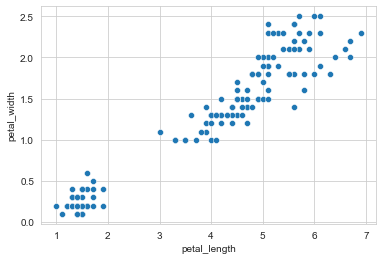

In [3]:
sns.set_style('whitegrid')
sns.scatterplot(data=iris,
               x='petal_length',
               y='petal_width',
#              hue='species'
               )
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
X, y = iris[['petal_length','petal_width']], iris['species']
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
y_pred = kmeans.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
value_map = {0: 'setosa', 1: 'virginica', 2: 'versicolor'}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred

array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'seto

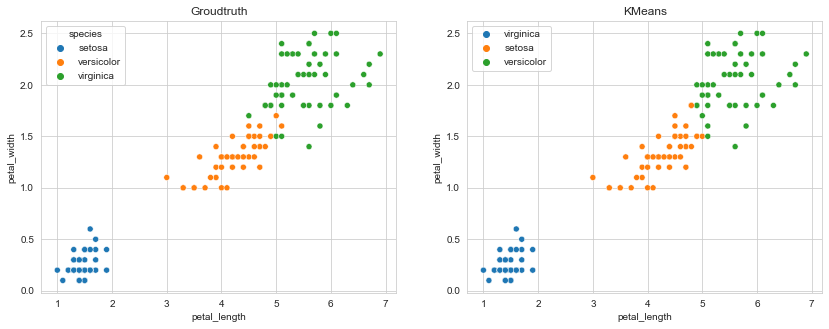

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
ax = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y,
                ax=axs[0]
               )
ax.set_title('Groudtruth')
ax1 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred,
                ax=axs[1]
               )
ax1.set_title('KMeans')
plt.show()

### Thử phân cụm nếu chưa biết Label có 3 nhãn: 'virginica', 'versicolor', 'setosa'
--> Thường thì phân cụm KMeans(n_clusters=) không phân quá 10 cụm

In [9]:
# sum of distance:
kmeans.inertia_

31.371358974358976

In [10]:
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append((i, km.inertia_))
sse
# distance càng thấp càng tốt

[(1, 550.8953333333333),
 (2, 86.39021984551395),
 (3, 31.371358974358976),
 (4, 19.477123363965468),
 (5, 13.91690875790876),
 (6, 11.147086299967425),
 (7, 9.18507591442374),
 (8, 7.621496965452847),
 (9, 6.480259206692711)]

In [11]:
sse = np.array(sse)
sse

array([[  1.        , 550.89533333],
       [  2.        ,  86.39021985],
       [  3.        ,  31.37135897],
       [  4.        ,  19.47712336],
       [  5.        ,  13.91690876],
       [  6.        ,  11.1470863 ],
       [  7.        ,   9.18507591],
       [  8.        ,   7.62149697],
       [  9.        ,   6.48025921]])

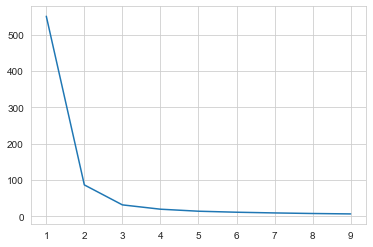

In [12]:
# elbow plot:
fig = plt.figure()
plt.plot(sse[:,0], sse[:,1])
plt.show()
# điểm x=3 là điểm khuỷu tay (K_optimal)

## 2. Hierachical clustering: `agglomerative clustering` 
![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png)
![](https://miro.medium.com/max/1039/0*afzanWwrDq9vd2g-)

- <font color = "lightblue">Nếu không định nghĩa n_clusters thì số Clusters mặc định = 2</font>

In [13]:
# Agglomerative tính Average từng nhóm cluster --> so k/c với các điểm khác, điểm nào gần thì tiếp tục đưa vào cụm
# Agglomerative: nhạy cảm với data nhiễu --> KMeans xử lý trong data nhiễu OK hơn
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering()
y_pred_1 = agglo.fit_predict(X)

In [14]:
y_pred_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)
y_pred_2 = agglo.fit_predict(X)

In [16]:
y_pred_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
value_map = {0: 'setosa', 1: 'virginica', 2: 'versicolor'}
y_pred_2 = np.array([value_map[i] for i in y_pred_2])
y_pred_2

array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor

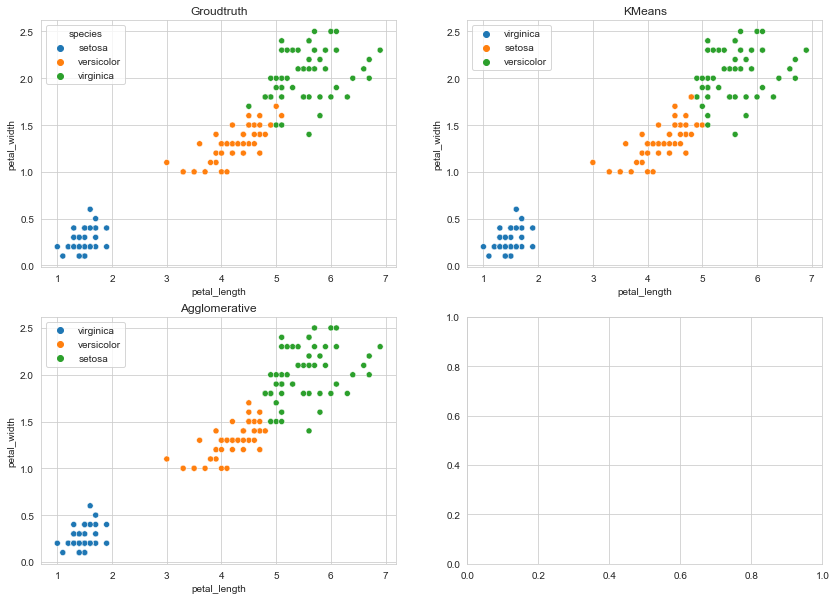

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))
ax = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y,
                ax=axs[0,0]
               )
ax.set_title('Groudtruth')
ax1 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred,
                ax=axs[0,1]
               )
ax1.set_title('KMeans')
ax2 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred_2,
                ax=axs[1,0]
               )
ax2.set_title('Agglomerative')
plt.show()

## 3. Density-based clustering: `DBSCAN`
![](https://user-images.githubusercontent.com/7659/74451662-d2325000-4e34-11ea-9770-a57e81259eb9.png)
![](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

- <font color = "blue">`DBSCAN` tối ưu hơn `KMeans` vì 'KMeans' chỉ phân cụm được theo đường tuyến tính, 'DBSCAB' phân cụm được cả Linear & non-Linear</font>
- <font color = "blue">Tuy nhiên `DBSCAN` thường dùng cho data ít chiều</font>

1. <font color = "yellow">Define kind of points in data given (`pi,eps`)</font>
- <font color = "orange">**Core point:** <font color = "lightblue">contains at least `pi` data points within radius `eps`</font>
- <font color = "orange">**Border point:** <font color = "lightblue">not Core point + have to contain at least 1 Core point within radius `eps`</font>
- <font color = "orange">**Noise point:** <font color = "lightblue">neither Core point nor Border point</font>
2. <font color = "yellow">Create a graph which depends on Core point if their `eps` are overlapped</font>
3. <font color = "yellow">Create connected components & assign Border points to connected components</font>
4. <font color = "yellow">Return points in each connected component as a Cluster</font>

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)              # eps & pi
y_pred_3 = dbscan.fit_predict(X)

In [21]:
y_pred_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
value_map = {0: 'setosa', 1: 'virginica', 2: 'versicolor'}
y_pred_3 = np.array([value_map[i] for i in y_pred_3])
y_pred_3

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virg

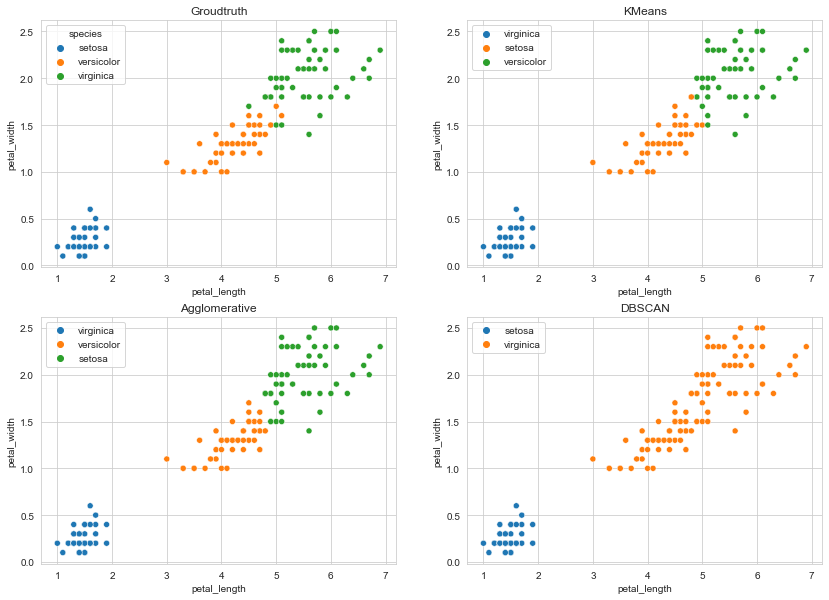

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))
ax = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y,
                ax=axs[0,0]
               )
ax.set_title('Groudtruth')
ax1 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred,
                ax=axs[0,1]
               )
ax1.set_title('KMeans')
ax2 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred_2,
                ax=axs[1,0]
               )
ax2.set_title('Agglomerative')
ax3 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred_3,
                ax=axs[1,1]
               )
ax3.set_title('DBSCAN')
plt.show()